# CALCULATING THE SIGNIFICANCE OF VARIOUS FEATURES ON CTR

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)


In [455]:
df = pd.read_csv("report.csv" )
df = df.drop(['Unnamed: 0'], axis =1)

In [456]:
df = df.rename(columns = {'Unique Outbound CTR (Click-Through Rate)' :'CTR'})

In [457]:
df.head()

,Campaign Name,Ad Set Name,Age,Gender,Results,Reach,Impressions,CTR,gainpain,ad
0,S1_Breakfast,25-45 - Parenting [kids 3-5],25-34,female,26.0,3017,3354,0.861783,Pain,No time to serve nutritious breakfast
1,S1_Breakfast,25-45 - Parenting [kids 9-12],35-44,female,47.0,2802,3006,1.641685,Pain,No time to serve nutritious breakfast
2,S1_MorningStart,25-45 - Parenting [kids 9-12],35-44,female,37.0,2767,3024,1.301048,Pain,Food is unsafe if kids eat out
3,S1_MorningStart,25-45 - Parenting [kids 9-12],35-44,female,31.0,2453,2667,1.222992,Pain,Difficult to plan what to eat because of different preferences and to ensure variety
4,S1_Breakfast,25-45 - Parenting [kids 3-5],25-34,female,18.0,2836,2974,0.634697,Pain,Preservatives in Food


In [458]:
df = df.fillna(0)

## QUICK ANALYSIS OF THE DATA (Note: the function I wrote below is super useful quick understand the nature of your. For example, how many nulls you have, how skewed is the data, how the target features is correlated with other features, etc)

In [459]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [460]:
rstr(df, pred = 'CTR')

Data shape: (131, 10)
___________________________
Data types:
 object     6
float64    2
int64      2
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr CTR
Campaign Name,object,131,2,0,0.0,"[[S1_Breakfast, S1_MorningStart]]",NaN,NaN,NaN
Ad Set Name,object,131,3,0,0.0,"[[25-45 - Parenting [kids 3-5], 25-45 - Parenting [kids 9-12], 25-45 - Parenting [kids 6-8]]]",NaN,NaN,NaN
Age,object,131,3,0,0.0,"[[25-34, 35-44, 45-54]]",NaN,NaN,NaN
Gender,object,131,1,0,0.0,[[female]],NaN,NaN,NaN
Results,float64,131,29,0,0.0,"[[26.0, 47.0, 37.0, 31.0, 18.0, 16.0, 17.0, 19.0, 9.0, 32.0, 23.0, 12.0, 24.0, 33.0, 22.0, 13.0, 20.0, 7.0, 11.0, 14.0, 8.0, 10.0, 5.0, 6.0, 2.0, 4.0, 3.0, 1.0, 0.0]]",1.669883,3.003091,0.042939
Reach,int64,131,101,0,0.0,"[[3017, 2802, 2767, 2453, 2836, 2752, 2686, 3131, 2519, 2586, 2285, 2606, 2668, 2270, 2132, 2362, 2464, 2671, 2565, 2561, 2459, 2217, 2584, 1596, 1432, 1911, 1763, 1211, 1152, 1522, 1729, 1046, 1647, 1433, 1594, 1363, 722, 1286, 753, 1183, 966, 854, 997, 1086, 723, 689, 900, 1006, 1116, 1325, 518, 801, 1173, 1051, 639, 1071, 691, 890, 856, 895, 578, 775, 522, 598, 609, 531, 607, 318, 532, 378, 394, 481, 303, 243, 221, 212, 226, 156, 192, 229, 217, 206, 73, 103, 93, 111, 91, 74, 11, 10, 23, 27, 15, 5, 8, 7, 9, 1, 4, 2, ...]]",0.901365,-0.535946,-0.028985
Impressions,int64,131,104,0,0.0,"[[3354, 3006, 3024, 2667, 2974, 2812, 2973, 3459, 2777, 2870, 2386, 2803, 2990, 2441, 2263, 2532, 2689, 2944, 2786, 2725, 2690, 2577, 2542, 2878, 1781, 1539, 1968, 1874, 1327, 1259, 1613, 1746, 1138, 1682, 1616, 1728, 822, 1397, 866, 1276, 1010, 922, 1118, 1155, 825, 776, 982, 1079, 1183, 1339, 567, 878, 1328, 1078, 711, 1143, 740, 938, 885, 1003, 609, 807, 559, 640, 673, 558, 647, 361, 539, 407, 410, 514, 333, 261, 226, 229, 251, 156, 198, 237, 232, 218, 75, 103, 101, 113, 99, 97, 77, 12, 24, 27, 16, 11, 6, 9, 7, 10, 8, 1, ...]]",0.918325,-0.483234,-0.027860
CTR,float64,131,86,0,0.0,"[[0.86178323, 1.64168451, 1.30104807, 1.22299225, 0.63469676, 1.12645349, 0.59568131, 0.51101884, 0.75426757, 0.69605568, 0.39387309, 0.72908672, 1.1994003, 1.01321586, 0.89118199, 0.50804403, 0.97402597, 1.19805316, 0.85769981, 0.6638031999999999, 0.61000407, 1.10076207, 0.58637799, 0.73529412, 0.43859649, 0.62849162, 0.57561486, 0.62393647, 1.15606936, 1.04166667, 0.72273325, 0.7518796999999999, 0.86042065, 0.48573163, 0.97697139, 0.75282309, 1.027146, 1.38504155, 0.62208398, 1.99203187, 0.76077768, 0.51759834, 0.58548009, 1.10330993, 1.01289134, 1.65975104, 1.01596517, 1.33333333, 0.59642147, 0.62724014, 0.52830189, 0.38610039, 0.74906367, 0.76726343, 0.66603235, 0.93896714, 0.65359477, 1.7366136000000003, 0.56179775, 0.70093458, 0.89385475, 0.69204152, 0.51612903, 0.57471264, 0.668...",6.907654,54.519827,1.000000
gainpain,object,131,2,0,0.0,"[[Pain , Gain ]]",NaN,NaN,NaN
ad,object,131,16,0,0.0,"[[ No time to serve nutritious breakfast, Food is unsafe if kids eat out, Difficult to plan what to eat because of different preferences and to ensure variety, Preservatives in Food, Kids prefer junk/fast food in the morning (Hamburger, fried chicken, chips), Want Variety, Kids picky eaters, Difficult to make nutritious choices (mom don't have knowledge), Have to force my kid to finish breakfast, Want delicious food for kids - Copy, Kids love drinks with high sugar level, Feed family nutritious meal, Want food that is clean/hygienic, Want delicious food for kids, Want kids to grow up strong, tall & healthy, Want food that is easily digestable]]",NaN,NaN,NaN


## VISUALIZATION PART (Here we are deep diving into our data to understand in depth the distribution of our data and what impact features have on CTR)

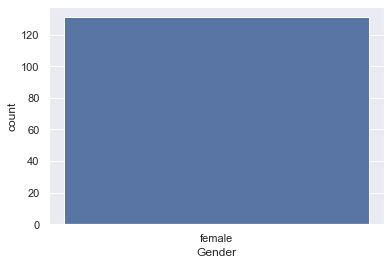

In [461]:
sns.countplot(df['Gender'])

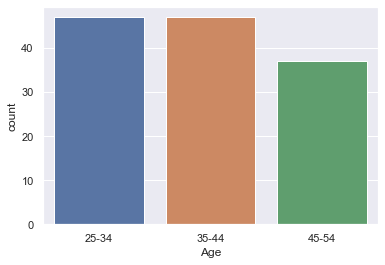

In [462]:
sns.countplot(df['Age'])

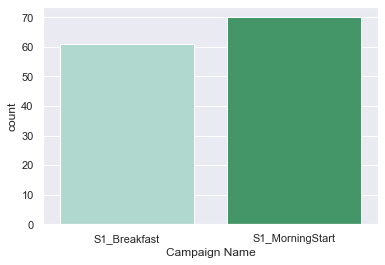

In [463]:

sns.countplot(df['Campaign Name'], color = 'b', palette= 'BuGn' )

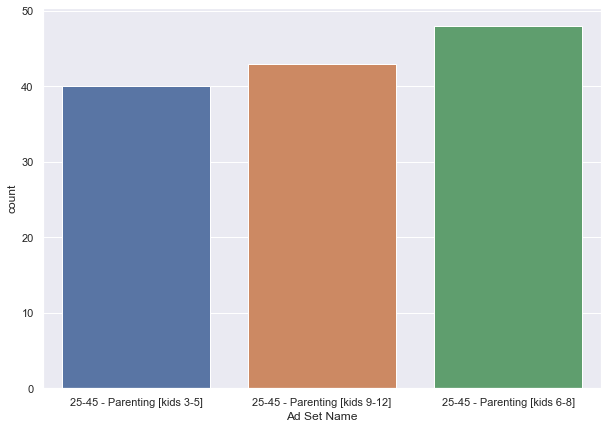

In [464]:
plt.figure(figsize=(10,7))
sns.countplot(df['Ad Set Name'])

In [465]:
df['CTR'].skew()

6.907654209922932

/Users/simonyanaleksandr/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


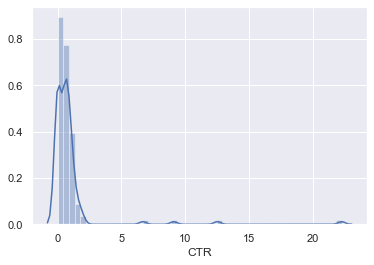

In [466]:
sns.distplot(df['CTR'])
### Note that your dependent variable is highly positively skewed. 
##Many statistical tests assume that dependent variables are normally distributed. The fact can affest the results, but still from data analysis process we will understand the impact of the features

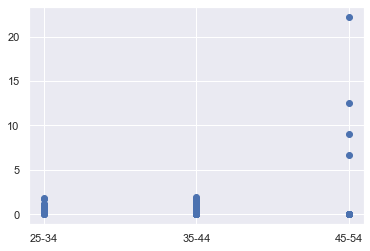

In [467]:
plt.scatter(x= df['Age'], y = df['CTR'])
## Here we can see outliers in 45-54 group. Clearly there is significant difference between the groups. 
## We will validate the statement with F-test

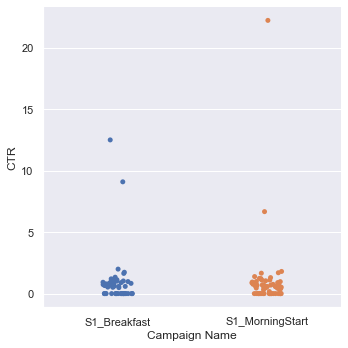

In [468]:
sns.catplot(x= 'Campaign Name', y ='CTR', data =df )
## Look like the distributions are the same

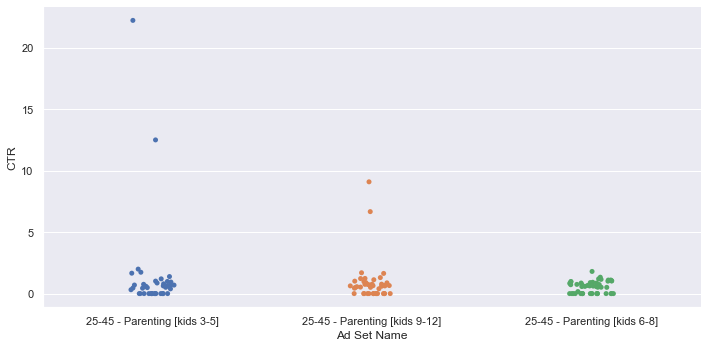

In [469]:
sns.catplot(x= 'Ad Set Name', y ='CTR', data =df , aspect = 2)
## Look like the distributions are the same

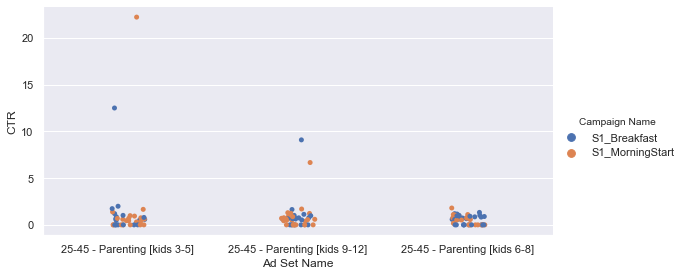

In [470]:
sns.set()
sns.catplot(x= 'Ad Set Name', y ='CTR', hue = 'Campaign Name', data = df, height=4, aspect=2)
## Same here

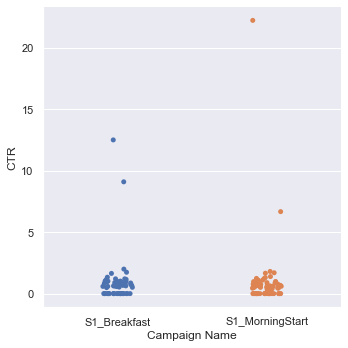

In [471]:
sns.catplot(x= 'Campaign Name', y ='CTR', data =df )

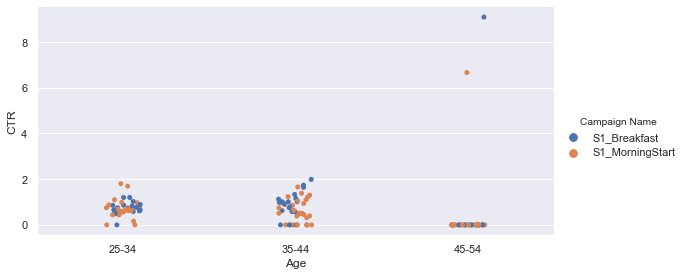

In [472]:
sns.catplot(x= 'Age', y ='CTR', hue = 'Campaign Name', data =df[df['CTR']<10], height=4, aspect=2 ) 

In [473]:
plt.figure(figsize=(270,150))
sns.set(font_scale = 5, font='bold',)
ax =  sns.boxplot(data = df[df['CTR']<5] ,  x  = 'ad', y = 'CTR', color = 'r', palette= 'PRGn')
ax.set(xlabel='common xlabel', ylabel='common ylabel')

plt.show()
## Here you can see that ads significantly vary CTR. Looks like ad is the most important factor 

## ADS THAT PERFORM SIGNIFICANTLY BETTER (we will calculate the CTR of particular ads, aggregate them, after that we will divide the value we get by the corresponding ad count. As a result, we will get the weighted average CTR of our Ad)

In [474]:
df.groupby(['ad'], as_index = False).agg({'CTR':'sum'})

,ad,CTR
0,Difficult to make nutritious choices (mom don't have knowledge),1.770753
1,Difficult to plan what to eat because of different preferences and to ensure variety,32.254154
2,Feed family nutritious meal,6.081220
3,Food is unsafe if kids eat out,12.556096
4,Have to force my kid to finish breakfast,2.849039
5,Kids love drinks with high sugar level,2.957134
6,Kids picky eaters,2.188021
7,"Kids prefer junk/fast food in the morning (Hamburger, fried chicken, chips)",2.604490
8,No time to serve nutritious breakfast,18.232540
9,Preservatives in Food,9.571118


In [475]:
ddd = df.groupby(['ad'],  as_index = False).agg({'count'})

In [476]:
ddd= ddd.reset_index()

In [477]:
ddd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   (ad, )                  16 non-null     object
 1   (Campaign Name, count)  16 non-null     int64 
 2   (Ad Set Name, count)    16 non-null     int64 
 3   (Age, count)            16 non-null     int64 
 4   (Gender, count)         16 non-null     int64 
 5   (Results, count)        16 non-null     int64 
 6   (Reach, count)          16 non-null     int64 
 7   (Impressions, count)    16 non-null     int64 
 8   (CTR, count)            16 non-null     int64 
 9   (gainpain, count)       16 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.4+ KB


In [478]:
columns = 'count'

In [479]:
ddd.columns = ['ad','count',3,4,5,6,7,8,9,10]

In [480]:
ddd =ddd[['ad', 'count']]

In [481]:
 campaign_count = ddd[['ad', 'count']]

In [482]:
CTR_sum =  df.groupby(['ad'], as_index = False).agg({'CTR':'sum'})

In [483]:
final_CTR = pd.merge(CTR_sum, campaign_count,how = 'inner', on = 'ad' )

In [484]:
final_CTR['weighted_agg_CTR'] = final_CTR['CTR']/final_CTR['count']


In [485]:
pd.set_option('max_colwidth', 800)
final_CTR.sort_values('weighted_agg_CTR',  ascending=False)
## Here you can see that 
###Difficult to plan what to eat because of different preferences and to ensure variety, 
## Want Variety
## No time to serve nutritious breakfas
## Food is unsafe if kids eat out
## significantly outperform other ads in terms of CTR

,ad,CTR,count,weighted_agg_CTR
1,Difficult to plan what to eat because of different preferences and to ensure variety,32.254154,15,2.150277
10,Want Variety,16.491436,9,1.832382
8,No time to serve nutritious breakfast,18.232540,13,1.402503
3,Food is unsafe if kids eat out,12.556096,9,1.395122
9,Preservatives in Food,9.571118,15,0.638075
12,Want delicious food for kids - Copy,1.195484,2,0.597742
0,Difficult to make nutritious choices (mom don't have knowledge),1.770753,3,0.590251
5,Kids love drinks with high sugar level,2.957134,6,0.492856
4,Have to force my kid to finish breakfast,2.849039,6,0.474840
2,Feed family nutritious meal,6.081220,13,0.467786


## SIGNIFICANCE CALCULATION (I will use T-test for two group features and F-test for those with three group)

In [486]:
Campaign_signif = df[['Campaign Name','CTR']]

In [487]:
from scipy.stats import ttest_ind
import scipy

In [488]:
cat1 = Campaign_signif[Campaign_signif['Campaign Name']=='S1_Breakfast']
cat2 = Campaign_signif[Campaign_signif['Campaign Name']=='S1_MorningStart']

In [489]:
ttest_ind(cat1['CTR'], cat2['CTR'])

Ttest_indResult(statistic=-0.026227084131411203, pvalue=0.9791167421518552)

In [490]:
scipy.stats.ttest_ind(cat1['CTR'], cat2['CTR'], equal_var=False)

Ttest_indResult(statistic=-0.02683784568587205, pvalue=0.978632209503987)

In [491]:
## As expected P value is much bigger than t Statistic, hence, campaign is not a significant feature ("Note, I have used two types of T tests and they showed almost   the same result")

In [492]:
Age_signif = df[['Age','CTR']]

In [493]:
from scipy.stats import f_oneway
age1 = Age_signif[Age_signif['Age']=='25-34'].drop(['Age'],axis=1)
age2 = Age_signif[Age_signif['Age']=='35-44'].drop(['Age'],axis=1)
age3 = Age_signif[Age_signif['Age']=='45-54'].drop(['Age'],axis=1)

In [494]:
stats.f_oneway(age1,age2, age3)
## Again from our EDA we saw that CTR dependent on Age varies significantly, and we can clearly see from the test that there. is significant difference in Age group
## Since P value is lower than F Staistic

F_onewayResult(statistic=array([0.95560397]), pvalue=array([0.38730608]))

In [495]:
adset1 = Adset_signif[Adset_signif['Ad Set Name']=='25-45 - Parenting [kids 3-5]']
adset2 = Adset_signif[Adset_signif['Ad Set Name']=='25-45 - Parenting [kids 9-12]']
adset3 = Adset_signif[Adset_signif['Ad Set Name']=='25-45 - Parenting [kids 6-8]']

In [496]:
ad1, ad2, ad3 = adset1.drop(['Ad Set Name'], axis =1), adset2.drop(['Ad Set Name'], axis =1), adset3.drop(['Ad Set Name'], axis =1)

In [497]:
stats.f_oneway(ad1,ad2, ad3)

F_onewayResult(statistic=array([1.39969563]), pvalue=array([0.25042161]))

In [498]:
## From teh test, we clearly see that there is signifance difference among adset